**Understanding the SQL DataBase**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [2]:
conn = sqlite3.connect("C:\\Users\\Sheilla Macharia\\Documents\\MoringaProjects\\assignments\\Phase_2_Project\\data\\im.db")

df= pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table';", conn)
df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [3]:
# Looking at the movie basics table
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
# Descriptive statistics of movie_basics table
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
# Checking for missing values
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [6]:
# checking for duplicate values
movie_basics.duplicated().sum()

0

**Cleaning the data**

In [7]:
# Dropping the runtime_minutes column due to high number of missing values
movie_basics.drop(columns=['runtime_minutes'], inplace=True)

In [8]:
movie_basics.isnull().sum()

movie_id             0
primary_title        0
original_title      21
start_year           0
genres            5408
dtype: int64

In [9]:
# Cleaning the original_title column
movie_basics['original_title'].value_counts()

original_title
Broken                                   19
Home                                     18
The Return                               17
Alone                                    13
Freedom                                  13
                                         ..
With Real Stars Above My Head             1
Alle anderen sind nicht gleich anders     1
ACP Ranveer                               1
Longtails                                 1
Chico Albuquerque - Revelações            1
Name: count, Length: 137773, dtype: int64

In [10]:
# dropping the missing rows in the original_title column
movie_basics.dropna(subset=['original_title'], inplace=True)


In [11]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146123 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   movie_id        146123 non-null  object
 1   primary_title   146123 non-null  object
 2   original_title  146123 non-null  object
 3   start_year      146123 non-null  int64 
 4   genres          140734 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.7+ MB


In [12]:
# Cleaning the genres column
movie_basics['genres'].value_counts()

genres
Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: count, Length: 1085, dtype: int64

In [13]:
genre_mode = movie_basics["genres"].mode()
genre_mode

0    Documentary
Name: genres, dtype: object

In [14]:
movie_basics['genres'] = movie_basics['genres'].fillna(genre_mode[0])

In [15]:
movie_basics.isna().sum()

movie_id          0
primary_title     0
original_title    0
start_year        0
genres            0
dtype: int64

In [16]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146123 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   movie_id        146123 non-null  object
 1   primary_title   146123 non-null  object
 2   original_title  146123 non-null  object
 3   start_year      146123 non-null  int64 
 4   genres          146123 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.7+ MB


**Visualizing the movie basics table**

C:\Users\Sheilla Macharia\AppData\Local\Temp\ipykernel_2800\2950374996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movie_basics, x='start_year', palette='viridis')


Text(0.5, 1.0, 'Number of Movies Released Each Year')

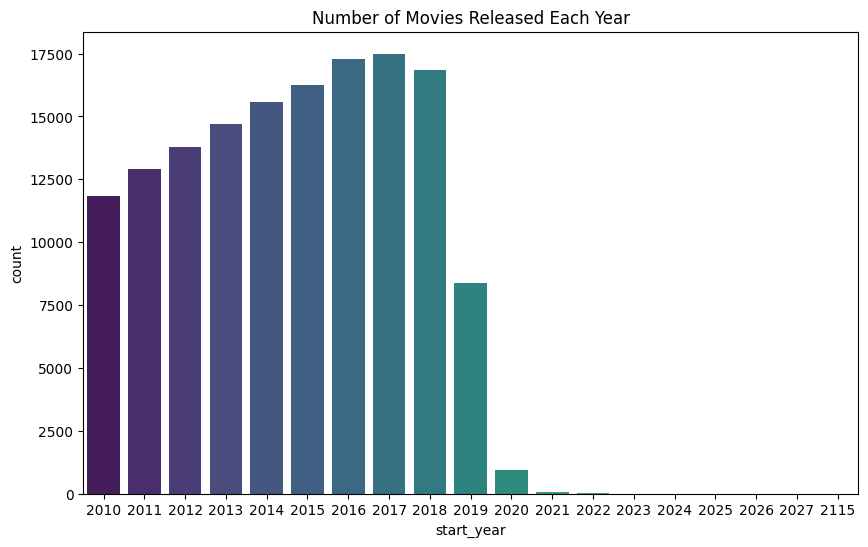

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=movie_basics, x='start_year', palette='viridis')
plt.title('Number of Movies Released Each Year')

C:\Users\Sheilla Macharia\AppData\Local\Temp\ipykernel_2800\2015505344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movie_basics, y='genres', order=movie_basics['genres'].value_counts().index[:20], palette='viridis')


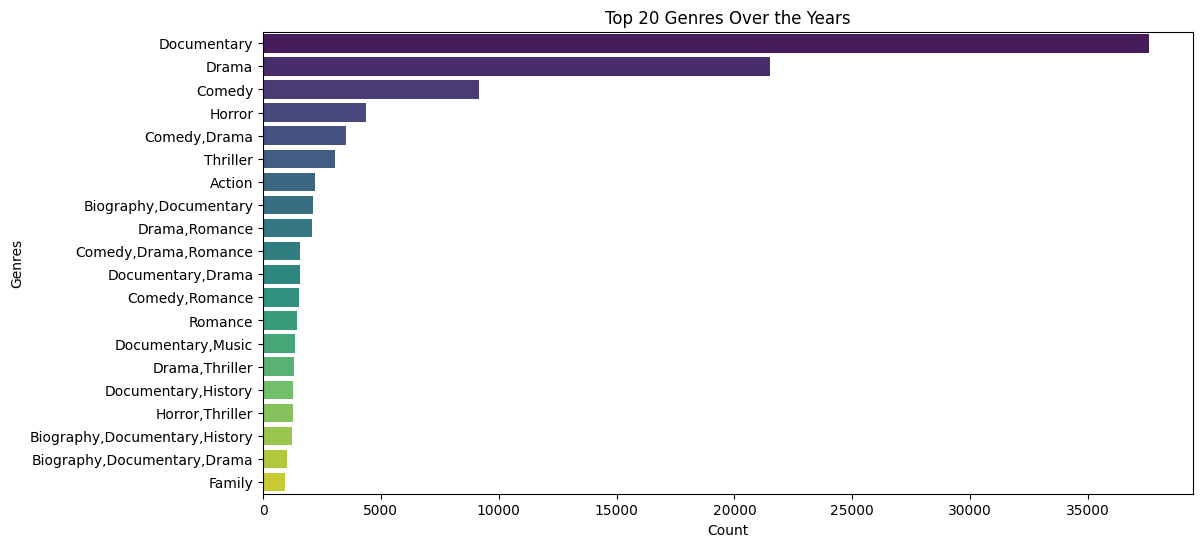

In [23]:
# Top 20 genres produced
plt.figure(figsize=(12, 6))
sns.countplot(data=movie_basics, y='genres', order=movie_basics['genres'].value_counts().index[:20], palette='viridis')
plt.title('Top 20 Genres Over the Years')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

In [24]:
# Looking at the movie ratings table
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
# downloading the clean movie_basics table to a csv file
movie_basics.to_csv("clean_movie_basics.csv", index=False)

In [26]:
# Closing the connection
conn.close()